In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import train data set
df= pd.read_csv('train.csv',index_col=0)
dftest = pd.read_csv('test.csv',index_col=0)

#Extra option for the dataframe for data.csv since it has too many columns that can't be displayed on default settings 
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

# Concatenate train and test set for preprocessing
whole_data = pd.concat((X,dftest)).reset_index(drop=True)

In [3]:
# Overview
display(whole_data.head())

# Data Inspection
display(whole_data.info())  #We see that data type is either object or int. categorical or numerical

#Categorical features
categorical_features = whole_data.dtypes[whole_data.dtypes=="object"].index.values
print(categorical_features)

#Numerical features
numerical_features = whole_data.dtypes[whole_data.dtypes!='object'].index.values
print(numerical_features)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

None

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']
['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' '

In [4]:
# Statistical summary
display(whole_data.describe())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


GarageYrBlt     0.486362
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
Name: SalePrice, dtype: float64


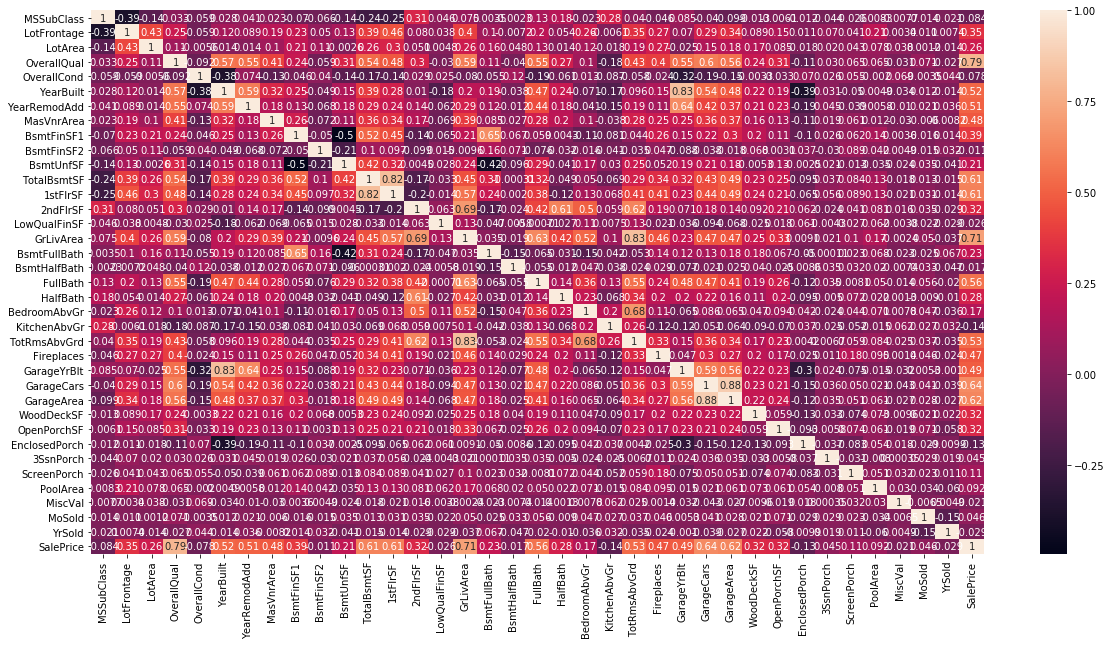

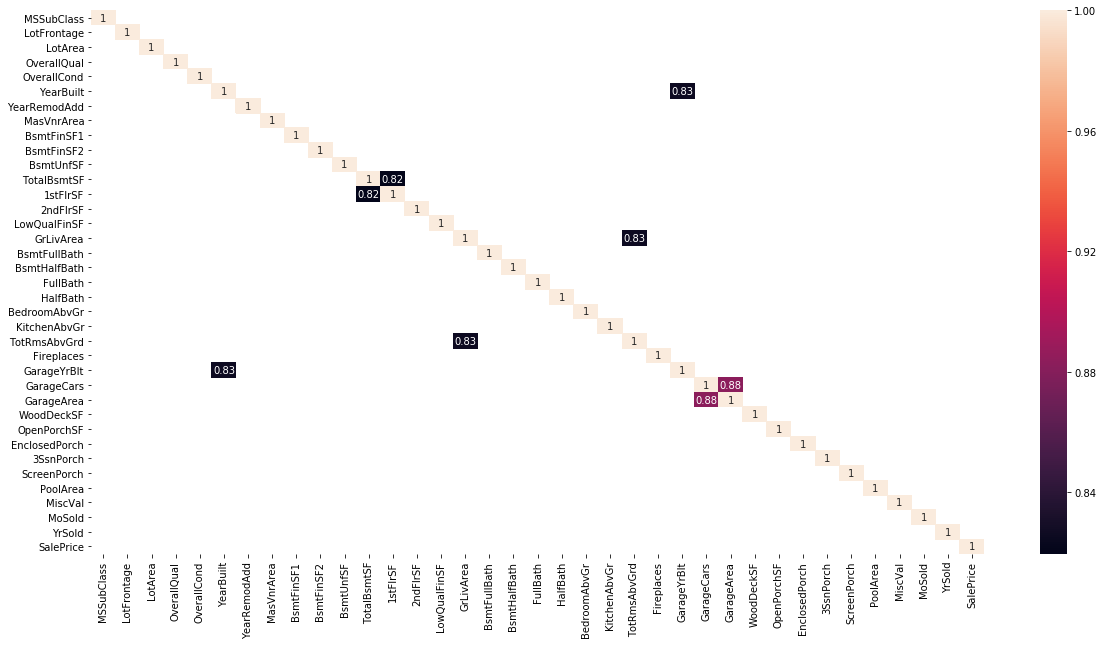

In [5]:
#Checking correlations between variables to identify multicollinearity issues
corrmap = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrmap,vmax=1,annot=True)

# To check the variables that have higher than 0.8 correlation coeffficients with each other
plt.figure(figsize=(20,10))
sns.heatmap(corrmap[abs(corrmap)>0.8],vmax=1,annot=True)

# We can see that ("GarageCars","GarageArea"),("YearBuilt","GarageYrBlt"),("TotRmsAbvGrd","GrLivArea"),("1stFlrSF","TotalBsmtSF") pairs have high correlation coefficient values. 

# If we look at them individually we can see why they are highly related. 
# Garage Cars and Garage Area intuitively makes sense because the number of cars you can fit in your garage depends on the size of your garage. 
# YearBuilt and GarageYrBlt is highly related because lots of time garage will built when the house is first built
# TotRmsAbvGrd and GrLivArea should be related because larger the living area is, higher numbers of rooms you will get
# 1stFlrSf and TotalBsmtSF sort of makes sense to have high correlation coefficients. Since I want to make use of both variables of those I will keep them.
corroptions=["GarageCars","GarageArea","YearBuilt","GarageYrBlt","TotRmsAbvGrd","GrLivArea"]
print(corrmap.iloc[:,-1][corroptions].sort_values(ascending=True))
# In the end to avoid multicollinearity we need to keep one of highly correlated variables. We will choose to leave the variables that have higher correlations with the sales price which is our dependent variable. Thus we will leave "GarageCars","YearBuilt","GrLivArea"

droppers=["GarageArea","TotRmsAbvGrd","GarageYrBlt"]
whole_data.drop(droppers,axis=1,inplace=True)

# Overview of dependent variable dataset

In [6]:
#Statistical Summary
y.describe()

count    1460.000000  
mean     180921.195890
std      79442.502883 
min      34900.000000 
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

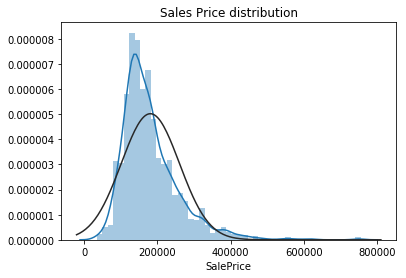

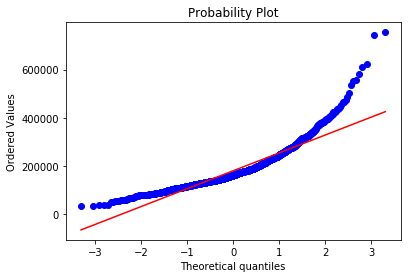

Sales price has skewness value of 1.8828757597682129
Sales price has kurtosis value of 6.536281860064529


In [7]:
# Simple visualization(histogram)
sns.distplot(y,fit=norm)
plt.title('Sales Price distribution');

#Get also the QQ-plot
plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

# We see visually that it is right skewed hence not normally distributed. Let's check it
print(f"Sales price has skewness value of {y.skew()}")
print(f"Sales price has kurtosis value of {y.kurt()}")

# We'll be performing linear regression by the end and since the original dependent variable set does not follow normal distribution, it is best to transform them so we get better result.

Sales price has skewness value of 0.12133506220520406
Sales price has kurtosis value of 0.8095319958036296


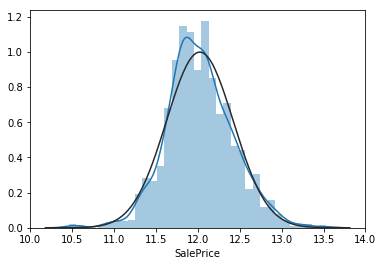

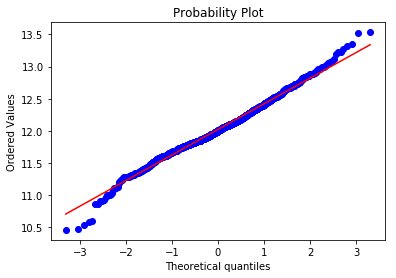

In [8]:
# Log transformation in order to make it normally distributed
ylog = np.log(y)

sns.distplot(ylog,fit=norm);
print(f"Sales price has skewness value of {ylog.skew()}")
print(f"Sales price has kurtosis value of {ylog.kurt()}")

## QQ plot
plt.figure()
res = stats.probplot(ylog, plot=plt)
plt.show()

# It is not perfectly correlated but its skew is corrected and we will proceed with this.

# Data Cleaning

In [9]:
# Check for NaN values
NaNlist = whole_data.isna().sum()

# Listing features with NaN values only
NaNlist = NaNlist[NaNlist.values!=0]
# Sort it in descending order and get the percentage that NaN value takes 
NaNlist_percentage = NaNlist.sort_values(ascending=False) / whole_data.shape[0]
display(NaNlist_percentage)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageCond      0.054471
GarageQual      0.054471
GarageFinish    0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
Utilities       0.000685
BsmtFullBath    0.000685
Functional      0.000685
BsmtHalfBath    0.000685
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
BsmtUnfSF       0.000343
dtype: float64

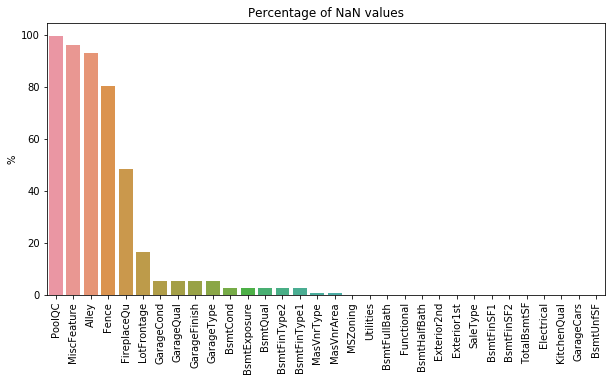

In [10]:
#Visualize it 
plt.figure(figsize=(10,5))
sns.barplot(x = NaNlist_percentage.index, y = NaNlist_percentage.values * 100);
plt.title("Percentage of NaN values");
plt.ylabel("%");
plt.xticks(rotation=90)
plt.show;

I decided to drop any features that have more than 10% of NaN values because it is hard to fill NaN values and we will have very weak basis to do so.

In [11]:
dropfeatures = NaNlist[NaNlist_percentage>0.1].index
whole_data = whole_data.drop(dropfeatures,axis=1) # We dropped 6 columns that had more than 10% of NaN values

Let's take a look at these left over features with NaN values

In [12]:
NaNlist = whole_data.isna().sum()
NaNlist[NaNlist!=0]

MSZoning        4  
Utilities       2  
Exterior1st     1  
Exterior2nd     1  
MasVnrType      24 
MasVnrArea      23 
BsmtQual        81 
BsmtCond        82 
BsmtExposure    82 
BsmtFinType1    79 
BsmtFinSF1      1  
BsmtFinType2    80 
BsmtFinSF2      1  
BsmtUnfSF       1  
TotalBsmtSF     1  
Electrical      1  
BsmtFullBath    2  
BsmtHalfBath    2  
KitchenQual     1  
Functional      2  
GarageType      157
GarageFinish    159
GarageCars      1  
GarageQual      159
GarageCond      159
SaleType        1  
dtype: int64

In [13]:
# For missing values in Garage columns, null values exist because there's no garage. We will fill null values with either 0 or No.

QuanGarage = ['GarageCars'] #Numerical columns
QualGargae = ['GarageType','GarageQual','GarageCond','GarageFinish'] #Categorical columns

#Imputing null values
whole_data[QuanGarage] = whole_data[QuanGarage].fillna(0)
whole_data[QualGargae] = whole_data[QualGargae].fillna('None')

In [14]:
#SaleType
#Only one missing value and no particular relationship with other features. Replace it with mode()
whole_data.SaleType = whole_data.SaleType.fillna(whole_data.SaleType.mode()[0])

In [15]:
#Functional
# It is stated that missing values mean 'Typ' unless deducted

whole_data.Functional = whole_data.Functional.fillna('Typ')

In [16]:
# KitchenQual
whole_data.KitchenQual.value_counts()
#Only one missing values. Enough variance exists to provide predictive power. Replace it with mode()
whole_data.KitchenQual = whole_data.KitchenQual.fillna(whole_data.KitchenQual.mode()[0])

In [17]:
# MSZoning
whole_data.MSZoning.value_counts()

# There's only 4 missing values so we will replace missing values with mode(). Enough variance exists to provide predictive power

whole_data['MSZoning'] = whole_data['MSZoning'].fillna(whole_data['MSZoning'].mode()[0])

In [18]:
# For 'Electrical' it's hard to predict its missing value since it has little or no connection to other features. We will fill the missing value with its most occuring value

whole_data.Electrical.value_counts()

#Fill the missing value with mode() value.
whole_data.Electrical=whole_data.Electrical.fillna(whole_data.Electrical.mode()[0])

In [19]:
# For 'MasVnrType', null value means masonry veneer doesn't exist. Thus 'MasVnrArea' should be 0 accordingly.
whole_data['MasVnrType'] = whole_data['MasVnrType'].fillna('None')
whole_data['MasVnrArea'] = whole_data['MasVnrArea'].fillna(0)

In [20]:
# For missing values in 'BsmtQual','BsmtCond','BsmtEwhole_dataposure','BsmtFinType1' and 'BsmtFinType2', they mean there's no basements. We will fill them with 'None'

BsmtQual = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
whole_data[BsmtQual] = whole_data[BsmtQual].fillna('None')

# For 'BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF' and'TotalBsmtSF', they are all numerical features. They will have value of 0 for missing values for not having basements.

BsmtQuan = ['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
whole_data[BsmtQuan] = whole_data[BsmtQuan].fillna(0)

In [21]:
#Utilities
print(whole_data.Utilities.value_counts())

# We can see that except for 1 dataset all records are AllPub. Also we could see that all missing values are in test dataset. Having very small variance means that it will have close to zero predictive power as a feature. I will drop this feature.

whole_data.drop(columns='Utilities',axis=1,inplace=True)

AllPub    2916
NoSeWa    1   
Name: Utilities, dtype: int64


In [22]:
# Exterior1st, Exterior2nd
# Could not find any special relationship with other features and it has enough variance
display(whole_data.Exterior1st.value_counts())

# It only has 1 missing values each so we will replace it with mode() values
ext = ['Exterior1st','Exterior2nd']

for i in ext:
    whole_data[i] = whole_data[i].fillna(whole_data[i].mode()[0])

VinylSd    1025
MetalSd    450 
HdBoard    442 
Wd Sdng    411 
Plywood    221 
CemntBd    126 
BrkFace    87  
WdShing    56  
AsbShng    44  
Stucco     43  
BrkComm    6   
AsphShn    2   
CBlock     2   
Stone      2   
ImStucc    1   
Name: Exterior1st, dtype: int64

In [23]:
NaNlist = whole_data.isna().sum()
NaNlist[NaNlist!=0]

Series([], dtype: int64)

In [24]:
#Final check up for missing values in dataframe.
whole_data.isna().sum().values.sum()

0

 # Extra data cleaning process

In [25]:
# There are numerical features that are actually just categorical. Let's fix them.
# Building Class, converted to categorical
whole_data['MSSubClass'] = whole_data['MSSubClass'].apply(str) 

#Year and month sold,  converted to categorical
whole_data['YrSold'] = whole_data['YrSold'].astype(str)
whole_data['MoSold'] = whole_data['MoSold'].astype(str)

In [26]:
# Let's add one more attribute that has the information of sum of the lots since it is critical determinant for the price of house.

whole_data['SumSF'] = whole_data['TotalBsmtSF'] + whole_data['1stFlrSF'] + whole_data['2ndFlrSF']

In [27]:
# Box Cox transformation of skewed variables.
# For linear models to be more accurate, data should be normally distributed.

numerical_features= whole_data.dtypes[whole_data.dtypes!='object'].index.values
numerical_features

# Skewnewss of numerical features
skews = whole_data[numerical_features].skew().sort_values(ascending=False)
print(f'Skewnewss in numerical features')
skewness = pd.DataFrame({'Skewness' :skews})
display(skewness.head(10))

#Box Cox Transformation of skewed features
#We use the scipy function boxcox1p that calculates the Box-Cox transformation of 1+x. 

skewness = skewness[abs(skewness.Skewness) > 1]
print(f"There are {skewness.shape[0]} skewed numerical features to Box Cox transform")

from scipy.special import boxcox1p
skewed_features = skewness.index.values
lam = 0.15
for i in skewed_features:
    whole_data[i] = boxcox1p(whole_data[i], lam)

Skewnewss in numerical features


,Skewness
MiscVal,21.958480
PoolArea,16.907017
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
KitchenAbvGr,4.304467
BsmtFinSF2,4.148275
EnclosedPorch,4.005950
ScreenPorch,3.948723
BsmtHalfBath,3.933616


There are 18 skewed numerical features to Box Cox transform


# Data engineering(Label Encoding, Dummy Gen)

In [28]:
categorical_features = whole_data.dtypes[whole_data.dtypes=="object"].index.values
print(categorical_features)

# We will probably run linear model in the end so we need to convert categorical variables. Depending on the variables we can either pull Label Encoding(if it contains any information that has ordinal value) or Get_dummies(via one-hot encoding) 

ordinal = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional',  'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir','YrSold','MoSold']

for i in ordinal:
    LB = LabelEncoder()
    whole_data[i]= LB.fit_transform(whole_data[i])

['MSSubClass' 'MSZoning' 'Street' 'LotShape' 'LandContour' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition']


In [29]:
#Now we get dummy variables for categorical values
Z= pd.get_dummies(whole_data).reset_index(drop=True)
Z.shape

(2919, 224)

In [30]:
# We can separate the "whole_data" dataset back to train and test set so we can start modeling.
train = Z[:1460]
test = Z[1460:]

### Modeling
We can apply couple of regression models to predict house prices.
We could try Ridge, Lasso and XGBoost.


In [31]:
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import KFold, cross_val_score,train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

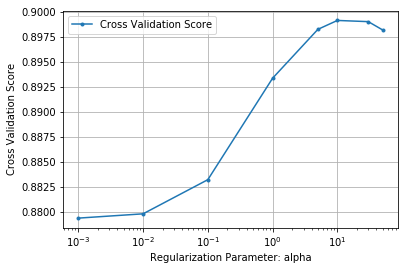

In [32]:
# Ridge (L2) Model
cross_validation_scores = []

# Main hyperparameter for Ridge is the alpha - a regularization parameter. Higer the parameter, less prone to overfit yet too high alpha might not capture the pattern. 
alpha_range = np.array([.001,0.01,.1,1,5,10,30,50]) 


#Cross validation with 5 folds
for i in alpha_range :
    ridges = Ridge(alpha = i,random_state=1)
    cv_score = np.mean(cross_val_score(ridges, train, ylog, cv = 5))
    cross_validation_scores.append(cv_score)
    

plt.figure()
plt.plot(alpha_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: alpha')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

# We see that alpha must be 10 with our result

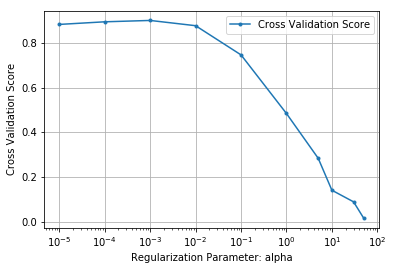

In [33]:
# Lasso (L1) Model
cross_validation_scores = []

# Main hyperparameter for Ridge is the alpha - a regularization parameter. Higer the parameter, less prone to overfit yet too high alpha might not capture the pattern. 
alpha_range = np.array([.00001,.0001,.001,0.01,.1,1,5,10,30,50]) 


#Cross validation with 5 folds
for i in alpha_range :
    lassos = Lasso(alpha = i,random_state=1)
    cv_score = np.mean(cross_val_score(lassos, train, ylog, cv = 5))
    cross_validation_scores.append(cv_score)
    

plt.figure()
plt.plot(alpha_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: alpha')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

# We see that alpha must be .001 with our result

In [34]:
# Defining cross validation a root mean square error function which shows the differences between values predicted by a model or an estimator and the values observed. 
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model,train,ylog,scoring='neg_mean_squared_error',cv=5))
    return(rmse)

In [35]:
ridge_mod = Ridge(alpha=10)
lasso_mod = Lasso(alpha=.001)

print(f'Ridge has rmse score of {rmse_cv(ridge_mod).mean()}')
print(f'Lasso has rmse score of {rmse_cv(lasso_mod).mean()}')

#Suppose between Lasso and Ridge, Lasso is slightly performing better

Ridge has rmse score of 0.12598567663277738
Lasso has rmse score of 0.12459422513972004


In [36]:
lasso_mod.fit(train,ylog)
coef = pd.Series(lasso_mod.coef_,index= train.columns)

In [37]:
print("Lasso picked "+ str(sum(coef!=0)) +" variables and deleted " + str(sum(coef==0)))

Lasso picked 72 variables and deleted 152


In [38]:
coef.sort_values().tail(15)

# We can see that Neighborhood factors are weighing in positively for the selling price largely yet doesn't intuitively make sense yet Sum Square feet and Overall Qual and GrLivArea make sense.

Neighborhood_BrkSide    0.028713
Neighborhood_NoRidge    0.029728
CentralAir              0.034777
Neighborhood_Somerst    0.041710
OverallCond             0.042424
1stFlrSF                0.042472
GrLivArea               0.043837
Condition1_Norm         0.051589
GarageCars              0.053137
Exterior1st_BrkFace     0.055212
OverallQual             0.057892
Neighborhood_StoneBr    0.062973
Neighborhood_NridgHt    0.064354
SumSF                   0.065949
Neighborhood_Crawfor    0.081194
dtype: float64

### XGBoost

In [39]:
#XGBoost has few parameters can affect results drastically. N_estimator and learning rate. N_estimator determines underfitting vs overfitting. Overly large N_estimator will make it overfit. In general, small learning rate and larget n_estimators will yield more accruate XGBoost models though it takes a bit longer to train. 

# XGBoost is generally known to be highly sensitive to hyperparameters, I have tried multiple hyperparameter optimization with grid search yet it's seem to be bugging out for now. Will update later on that part.

In [40]:
xgboost = XGBRegressor(n_estimators=3000,learning_rate=0.01,n_jobs=-1)
xgboost.fit(train,ylog,verbose=False)

print(rmse_cv(xgboost).mean())

[01:49:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:50:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:50:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:50:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:50:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:51:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.12548895683145353


In [41]:
# So far we have tried Ridge, Lasso and XGBoost model and based on RMSE score, Lasso performed the best.

#Let's submit the final work using Lasso

lasso_mod.fit(train,ylog)
fin_answer = np.expm1(lasso_mod.predict(test))

submission = pd.DataFrame()
submission['ID'] = np.arange(1461,2920)
submission['SalePrice'] = fin_answer

submission.to_csv('submission.csv',index=False)